# Основные Импорты

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
from sklearn.metrics import silhouette_score
from scipy import stats
from scipy.stats import pearsonr, spearmanr, chi2_contingency

# Загрузка данных
df = pd.read_csv('resources/Billionaires Statistics Dataset.csv')

# Пункт - 1. Типы и роли данных (1 балл)

## Решение
В этом блоке необходимо написать код, построить нужные визуализации и рассчитать нужные статистики для решения этой части задания. Можно создать столько ячеек с кодом, сколько нужно для выполнения задания

In [5]:
# Исследование структуры данных
print("Размерность данных:", df.shape)
print("\nПервые 5 строк:")
print(df.head())

print("\nИнформация о типах данных:")
print(df.info())

print("\nСтатистическое описание числовых переменных:")
print(df.describe())

print("\nСтатистическое описание категориальных переменных:")
print(df.describe(include=['object']))

# Анализ пропущенных значений
print("\nПропущенные значения:")
missing_data = df.isnull().sum()
print(missing_data[missing_data > 0])

Размерность данных: (2640, 35)

Первые 5 строк:
   rank  finalWorth               category                personName   age  \
0     1      211000       Fashion & Retail  Bernard Arnault & family  74.0   
1     2      180000             Automotive                 Elon Musk  51.0   
2     3      114000             Technology                Jeff Bezos  59.0   
3     4      107000             Technology             Larry Ellison  78.0   
4     5      106000  Finance & Investments            Warren Buffett  92.0   

         country    city              source             industries  \
0         France   Paris                LVMH       Fashion & Retail   
1  United States  Austin       Tesla, SpaceX             Automotive   
2  United States  Medina              Amazon             Technology   
3  United States   Lanai              Oracle             Technology   
4  United States   Omaha  Berkshire Hathaway  Finance & Investments   

  countryOfCitizenship  ... cpi_change_country          

## Ответ
В этом блоке необходимо вывести ответ для этой части задания. Ответ должен описаться на написанный код, построенные визуализации и проведенные расчеты. Если необходимо, то можно записать ответ в нескольких ячейках.

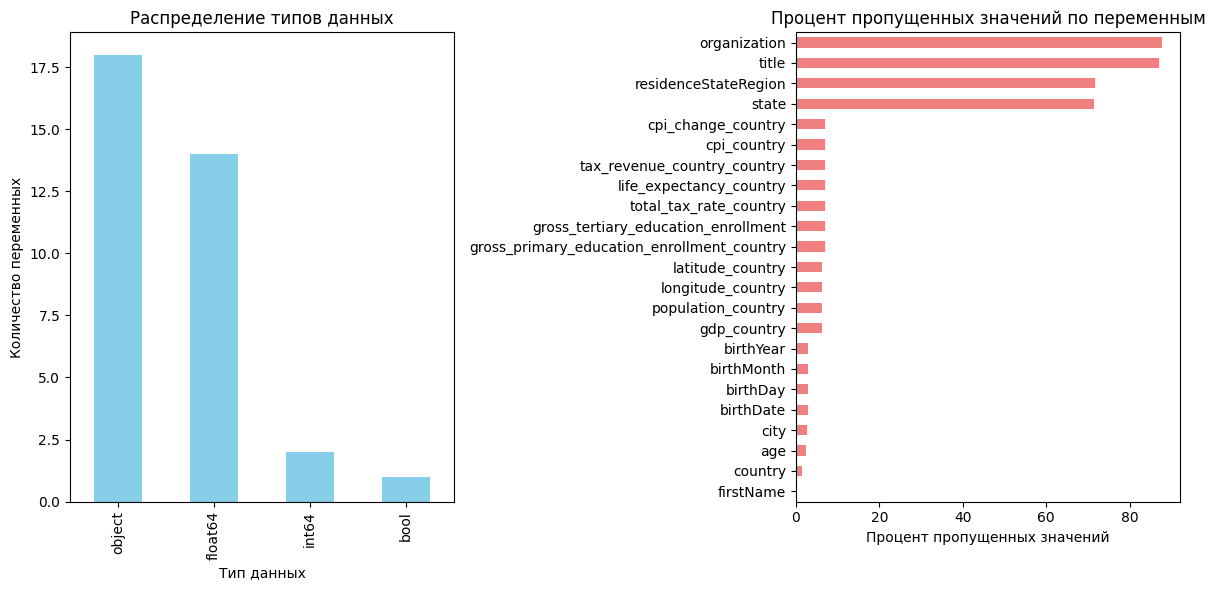

In [6]:
# Визуализация распределения типов данных
plt.figure(figsize=(12, 6))

# Количество переменных по типам
dtype_counts = df.dtypes.value_counts()
plt.subplot(1, 2, 1)
dtype_counts.plot(kind='bar', color='skyblue')
plt.title('Распределение типов данных')
plt.xlabel('Тип данных')
plt.ylabel('Количество переменных')

# Процент пропущенных значений
plt.subplot(1, 2, 2)
missing_percent = (df.isnull().sum() / len(df) * 100)
missing_percent = missing_percent[missing_percent > 0]
missing_percent.sort_values(ascending=True).plot(kind='barh', color='lightcoral')
plt.title('Процент пропущенных значений по переменным')
plt.xlabel('Процент пропущенных значений')

plt.tight_layout()
plt.show()

# Пункт - 2. Пропущенные значения (1 балл)

## Решение
В этом блоке необходимо написать код, построить нужные визуализации и рассчитать нужные статистики для решения этой части задания. Можно создать столько ячеек с кодом, сколько нужно для выполнения задания

In [7]:
# Анализ пропущенных значений
print("=== ОБЩИЙ АНАЛИЗ ПРОПУЩЕННЫХ ЗНАЧЕНИЙ ===")
print(f"Общее количество строк: {len(df)}")
print(f"Общее количество пропущенных значений: {df.isnull().sum().sum()}")
print(f"Процент пропущенных значений в наборе данных: {(df.isnull().sum().sum() / (len(df) * len(df.columns)) * 100):.2f}%")

# Детальный анализ по колонкам
missing_data = df.isnull().sum()
missing_percent = (missing_data / len(df)) * 100

print("\n=== ПРОПУЩЕННЫЕ ЗНАЧЕНИЯ ПО КОЛОНКАМ ===")
missing_info = pd.DataFrame({
    'Колонка': missing_data.index,
    'Пропущено': missing_data.values,
    'Процент': missing_percent.values
})
missing_info = missing_info[missing_info['Пропущено'] > 0].sort_values('Процент', ascending=False)
print(missing_info)

=== ОБЩИЙ АНАЛИЗ ПРОПУЩЕННЫХ ЗНАЧЕНИЙ ===
Общее количество строк: 2640
Общее количество пропущенных значений: 10812
Процент пропущенных значений в наборе данных: 11.70%

=== ПРОПУЩЕННЫЕ ЗНАЧЕНИЯ ПО КОЛОНКАМ ===
                                       Колонка  Пропущено    Процент
10                                organization       2315  87.689394
17                                       title       2301  87.159091
20                        residenceStateRegion       1893  71.704545
19                                       state       1887  71.477273
25                          cpi_change_country        184   6.969697
24                                 cpi_country        184   6.969697
30                 tax_revenue_country_country        183   6.931818
27         gross_tertiary_education_enrollment        182   6.893939
31                      total_tax_rate_country        182   6.893939
29                     life_expectancy_country        182   6.893939
28  gross_primary_education_en

## Ответ
В этом блоке необходимо вывести ответ для этой части задания. Ответ должен описаться на написанный код, построенные визуализации и проведенные расчеты. Если необходимо, то можно записать ответ в нескольких ячейках.

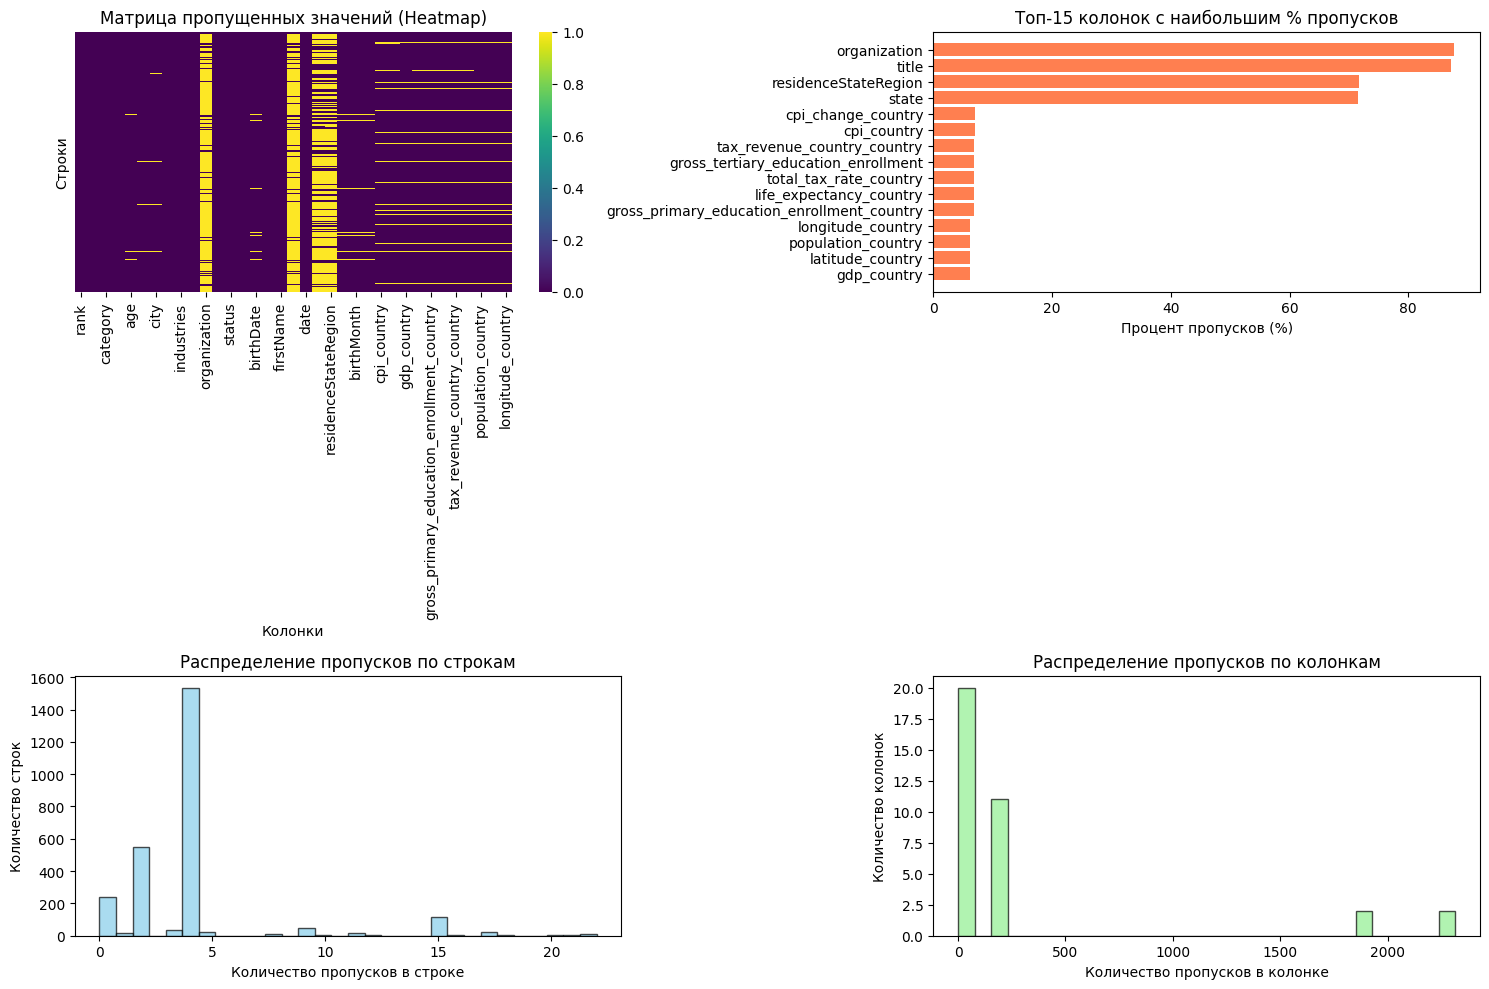

In [8]:
# Визуализация пропущенных значений
plt.figure(figsize=(15, 10))

# Heatmap пропущенных значений
plt.subplot(2, 2, 1)
missing_matrix = df.isnull()
sns.heatmap(missing_matrix, cbar=True, yticklabels=False, cmap='viridis')
plt.title('Матрица пропущенных значений (Heatmap)')
plt.xlabel('Колонки')
plt.ylabel('Строки')

# Процент пропущенных значений по колонкам
plt.subplot(2, 2, 2)
top_missing = missing_info.head(15)
plt.barh(top_missing['Колонка'], top_missing['Процент'], color='coral')
plt.title('Топ-15 колонок с наибольшим % пропусков')
plt.xlabel('Процент пропусков (%)')
plt.gca().invert_yaxis()

# Распределение количества пропусков по строкам
plt.subplot(2, 2, 3)
missing_per_row = df.isnull().sum(axis=1)
plt.hist(missing_per_row, bins=30, alpha=0.7, color='skyblue', edgecolor='black')
plt.title('Распределение пропусков по строкам')
plt.xlabel('Количество пропусков в строке')
plt.ylabel('Количество строк')

# Распределение количества пропусков по колонкам
plt.subplot(2, 2, 4)
missing_per_col = df.isnull().sum()
plt.hist(missing_per_col, bins=30, alpha=0.7, color='lightgreen', edgecolor='black')
plt.title('Распределение пропусков по колонкам')
plt.xlabel('Количество пропусков в колонке')
plt.ylabel('Количество колонок')

plt.tight_layout()
plt.show()

# Пункт - 3 - Сводные показатели (2 балла)



## Решение
В этом блоке необходимо написать код, построить нужные визуализации и рассчитать нужные статистики для решения этой части задания. Можно создать столько ячеек с кодом, сколько нужно для выполнения задания

In [9]:
# Настройка визуализации
plt.style.use('default')
sns.set_palette("husl")

print("=== БАЗОВЫЕ СВОДНЫЕ ПОКАЗАТЕЛИ ===")
print(f"Общее количество миллиардеров: {len(df)}")
print(f"Период данных: {df['date'].min()} - {df['date'].max()}")

=== БАЗОВЫЕ СВОДНЫЕ ПОКАЗАТЕЛИ ===
Общее количество миллиардеров: 2640
Период данных: 4/4/2023 5:01 - 4/4/2023 9:01


## Ответ
В этом блоке необходимо вывести ответ для этой части задания. Ответ должен описаться на написанный код, построенные визуализации и проведенные расчеты. Если необходимо, то можно записать ответ в нескольких ячейках.

In [10]:
# 1. Анализ распределения богатства
print("\n=== АНАЛИЗ РАСПРЕДЕЛЕНИЯ БОГАТСТВА ===")

wealth_stats = df['finalWorth'].describe()
print("Статистика по состоянию (finalWorth) в млн $:")
print(f"Среднее: {wealth_stats['mean']:,.0f}")
print(f"Медиана: {wealth_stats['50%']:,.0f}")
print(f"Стандартное отклонение: {wealth_stats['std']:,.0f}")
print(f"Минимум: {wealth_stats['min']:,.0f}")
print(f"Максимум: {wealth_stats['max']:,.0f}")
print(f"Первый квартиль (25%): {wealth_stats['25%']:,.0f}")
print(f"Третий квартиль (75%): {wealth_stats['75%']:,.0f}")

# Дополнительные метрики
print(f"\nДополнительные метрики:")
print(f"Коэффициент вариации: {(wealth_stats['std']/wealth_stats['mean']*100):.1f}%")
print(f"Асимметрия (skewness): {df['finalWorth'].skew():.2f}")
print(f"Эксцесс (kurtosis): {df['finalWorth'].kurtosis():.2f}")


=== АНАЛИЗ РАСПРЕДЕЛЕНИЯ БОГАТСТВА ===
Статистика по состоянию (finalWorth) в млн $:
Среднее: 4,624
Медиана: 2,300
Стандартное отклонение: 9,834
Минимум: 1,000
Максимум: 211,000
Первый квартиль (25%): 1,500
Третий квартиль (75%): 4,200

Дополнительные метрики:
Коэффициент вариации: 212.7%
Асимметрия (skewness): 10.01
Эксцесс (kurtosis): 145.07


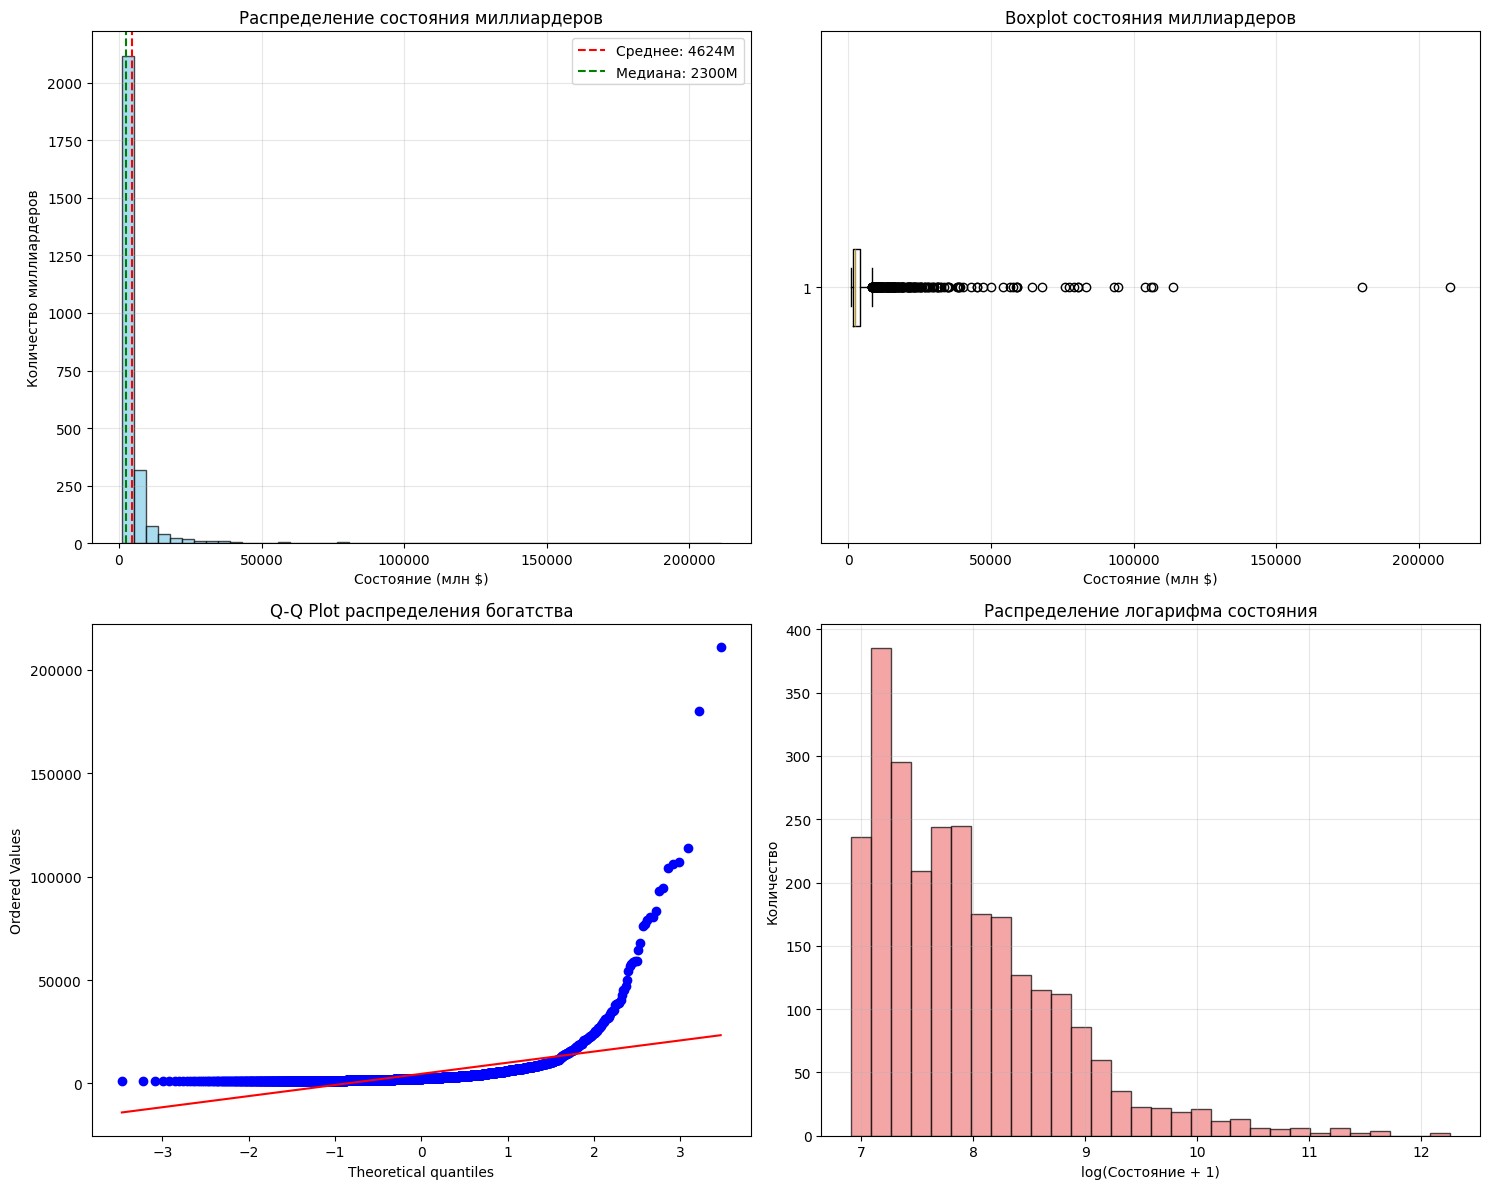

In [19]:
# Визуализация распределения богатства
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Гистограмма распределения богатства
axes[0,0].hist(df['finalWorth'], bins=50, alpha=0.7, color='skyblue', edgecolor='black')
axes[0,0].axvline(df['finalWorth'].mean(), color='red', linestyle='--', label=f'Среднее: {df["finalWorth"].mean():.0f}M')
axes[0,0].axvline(df['finalWorth'].median(), color='green', linestyle='--', label=f'Медиана: {df["finalWorth"].median():.0f}M')
axes[0,0].set_xlabel('Состояние (млн $)')
axes[0,0].set_ylabel('Количество миллиардеров')
axes[0,0].set_title('Распределение состояния миллиардеров')
axes[0,0].legend()
axes[0,0].grid(True, alpha=0.3)

# Boxplot распределения богатства
axes[0,1].boxplot(df['finalWorth'], vert=False)
axes[0,1].set_xlabel('Состояние (млн $)')
axes[0,1].set_title('Boxplot состояния миллиардеров')
axes[0,1].grid(True, alpha=0.3)

# QQ-plot для проверки нормальности
stats.probplot(df['finalWorth'], dist="norm", plot=axes[1,0])
axes[1,0].set_title('Q-Q Plot распределения богатства')

# Распределение в логарифмической шкале
axes[1,1].hist(np.log1p(df['finalWorth']), bins=30, alpha=0.7, color='lightcoral', edgecolor='black')
axes[1,1].set_xlabel('log(Состояние + 1)')
axes[1,1].set_ylabel('Количество')
axes[1,1].set_title('Распределение логарифма состояния')
axes[1,1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


=== АНАЛИЗ ПО ОТРАСЛЯМ ===
Топ-10 отраслей по суммарному состоянию:
                       Количество  Суммарное_состояние  Среднее_состояние  \
industries                                                                  
Technology                    314              1877900             5981.0   
Fashion & Retail              266              1698800             6386.0   
Finance & Investments         372              1605100             4315.0   
Manufacturing                 324              1019000             3145.0   
Food & Beverage               212               957200             4515.0   
Diversified                   187               905200             4841.0   
Real Estate                   193               657400             3406.0   
Healthcare                    201               643200             3200.0   
Automotive                     73               525300             7196.0   
Energy                        100               453500             4535.0   

      

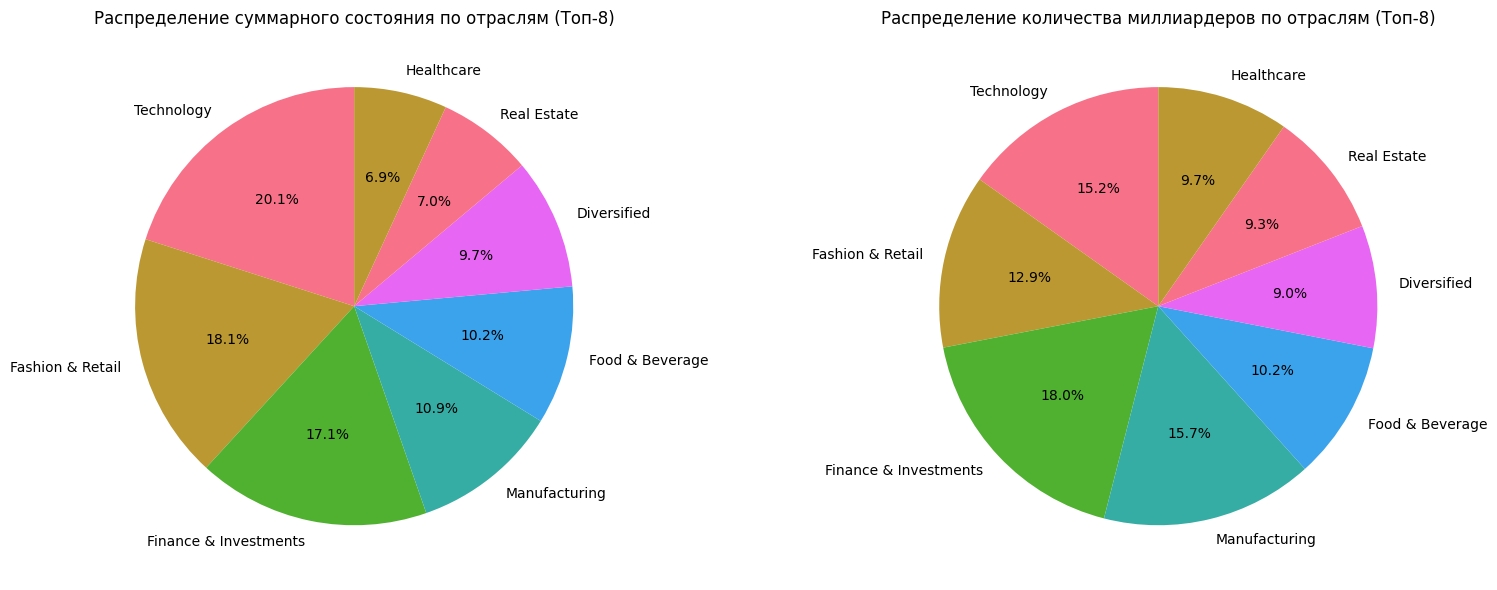

In [12]:
# 3. Анализ по отраслям (industries)
print("\n=== АНАЛИЗ ПО ОТРАСЛЯМ ===")

industry_stats = df.groupby('industries').agg({
    'finalWorth': ['count', 'sum', 'mean', 'median'],
    'personName': 'count'
}).round(0)

industry_stats.columns = ['Количество', 'Суммарное_состояние', 'Среднее_состояние', 
                        'Медиана_состояния', 'Всего_миллиардеров']
industry_stats = industry_stats.sort_values('Суммарное_состояние', ascending=False)

print("Топ-10 отраслей по суммарному состоянию:")
print(industry_stats.head(10))

# Визуализация по отраслям
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Круговые диаграммы
wealth_by_industry = industry_stats.head(8)['Суммарное_состояние']
count_by_industry = industry_stats.head(8)['Количество']

axes[0].pie(wealth_by_industry.values, labels=wealth_by_industry.index, autopct='%1.1f%%', startangle=90)
axes[0].set_title('Распределение суммарного состояния по отраслям (Топ-8)')

axes[1].pie(count_by_industry.values, labels=count_by_industry.index, autopct='%1.1f%%', startangle=90)
axes[1].set_title('Распределение количества миллиардеров по отраслям (Топ-8)')

plt.tight_layout()
plt.show()

In [13]:
# 4. Демографический анализ
print("\n=== ДЕМОГРАФИЧЕСКИЙ АНАЛИЗ ===")

# Анализ по возрасту
age_stats = df['age'].describe()
print("Статистика по возрасту:")
print(f"Средний возраст: {age_stats['mean']:.1f} лет")
print(f"Медианный возраст: {age_stats['50%']:.1f} лет")
print(f"Самый молодой: {age_stats['min']:.0f} лет")
print(f"Самый старший: {age_stats['max']:.0f} лет")

# Анализ по полу
gender_stats = df['gender'].value_counts()
print(f"\nРаспределение по полу:")
print(gender_stats)

gender_wealth = df.groupby('gender')['finalWorth'].agg(['mean', 'median', 'count'])
print(f"\nСтатистика состояния по полу:")
print(gender_wealth)

# Анализ self-made
selfmade_stats = df['selfMade'].value_counts()
print(f"\nРаспределение Self-Made:")
print(selfmade_stats)

selfmade_wealth = df.groupby('selfMade')['finalWorth'].agg(['mean', 'median', 'count'])
print(f"\nСтатистика состояния по Self-Made:")
print(selfmade_wealth)


=== ДЕМОГРАФИЧЕСКИЙ АНАЛИЗ ===
Статистика по возрасту:
Средний возраст: 65.1 лет
Медианный возраст: 65.0 лет
Самый молодой: 18 лет
Самый старший: 101 лет

Распределение по полу:
gender
M    2303
F     337
Name: count, dtype: int64

Статистика состояния по полу:
               mean  median  count
gender                            
F       4570.326409  2500.0    337
M       4631.610942  2300.0   2303

Распределение Self-Made:
selfMade
True     1812
False     828
Name: count, dtype: int64

Статистика состояния по Self-Made:
                 mean  median  count
selfMade                            
False     4970.410628  2600.0    828
True      4465.397351  2200.0   1812


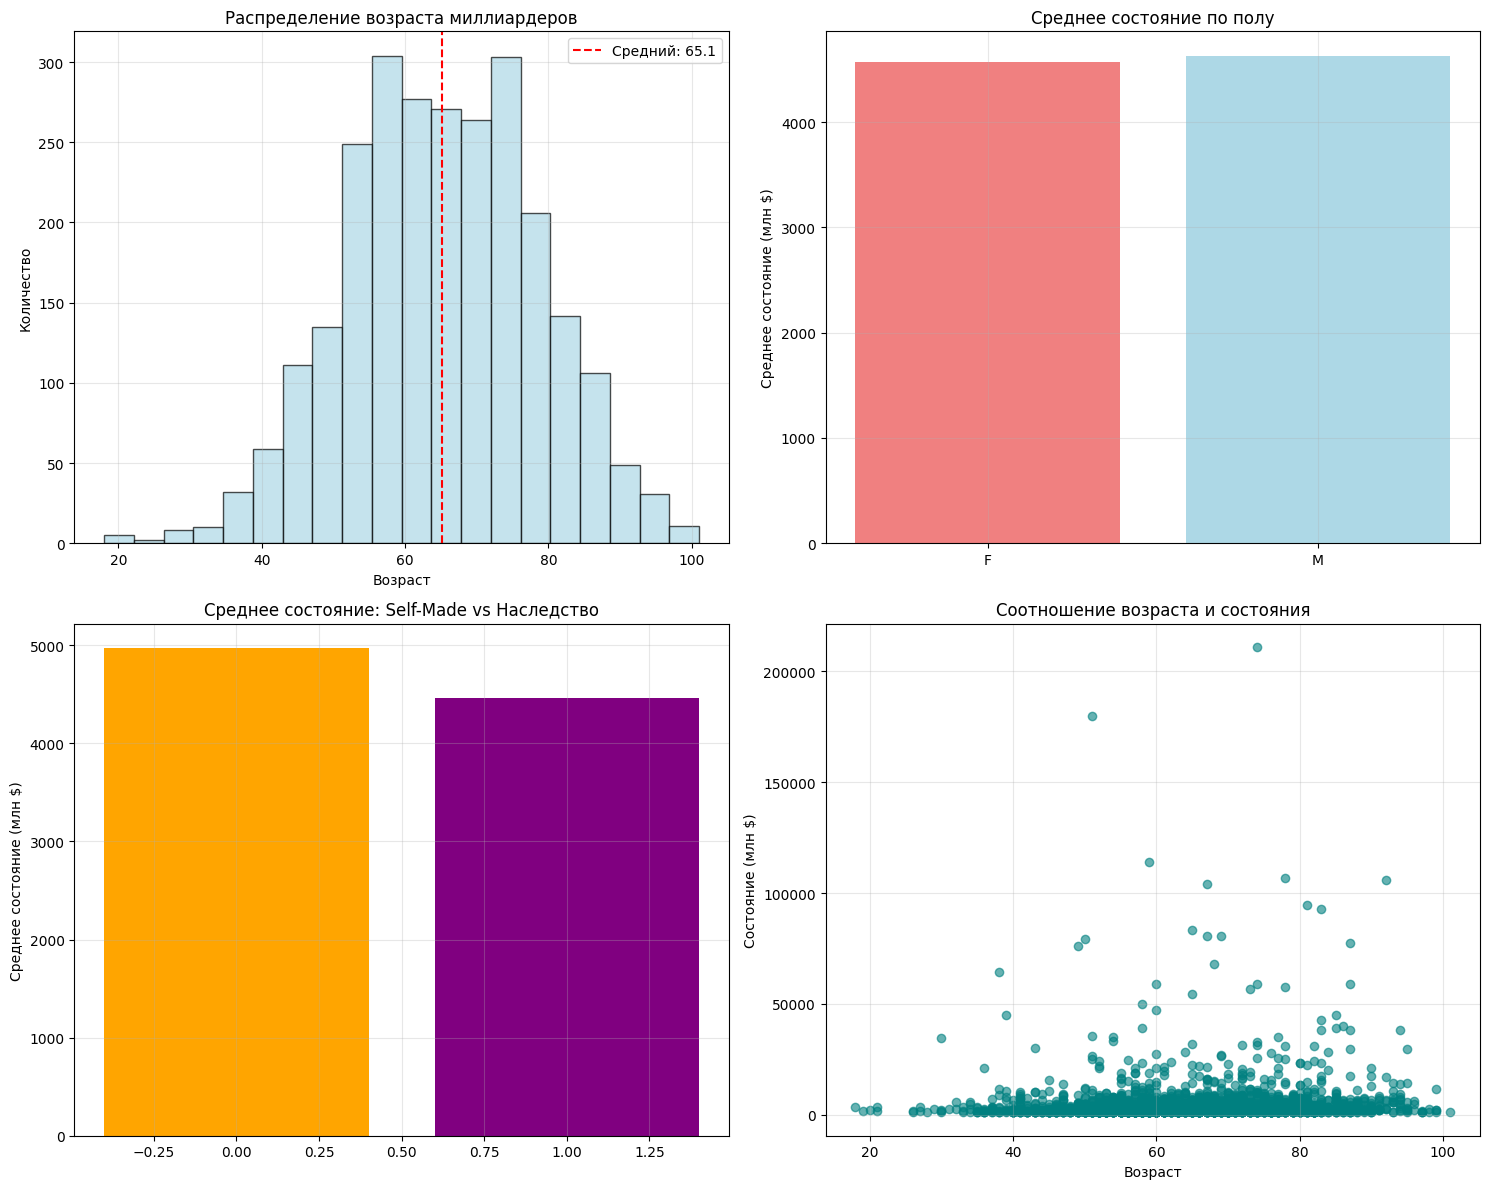

In [14]:
# Визуализация демографических показателей
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Распределение возраста
axes[0,0].hist(df['age'].dropna(), bins=20, alpha=0.7, color='lightblue', edgecolor='black')
axes[0,0].axvline(df['age'].mean(), color='red', linestyle='--', label=f'Средний: {df["age"].mean():.1f}')
axes[0,0].set_xlabel('Возраст')
axes[0,0].set_ylabel('Количество')
axes[0,0].set_title('Распределение возраста миллиардеров')
axes[0,0].legend()
axes[0,0].grid(True, alpha=0.3)

# Состояние по полу
gender_means = df.groupby('gender')['finalWorth'].mean()
axes[0,1].bar(gender_means.index, gender_means.values, color=['lightcoral', 'lightblue', 'lightgreen'])
axes[0,1].set_ylabel('Среднее состояние (млн $)')
axes[0,1].set_title('Среднее состояние по полу')
axes[0,1].grid(True, alpha=0.3)

# Состояние по self-made
selfmade_means = df.groupby('selfMade')['finalWorth'].mean()
axes[1,0].bar(selfmade_means.index, selfmade_means.values, color=['orange', 'purple'])
axes[1,0].set_ylabel('Среднее состояние (млн $)')
axes[1,0].set_title('Среднее состояние: Self-Made vs Наследство')
axes[1,0].grid(True, alpha=0.3)

# Возраст vs Состояние
axes[1,1].scatter(df['age'], df['finalWorth'], alpha=0.6, color='teal')
axes[1,1].set_xlabel('Возраст')
axes[1,1].set_ylabel('Состояние (млн $)')
axes[1,1].set_title('Соотношение возраста и состояния')
axes[1,1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [16]:
# 5. Корреляционный анализ
print("\n=== КОРРЕЛЯЦИОННЫЙ АНАЛИЗ ===")

# Выбираем числовые колонки для корреляционного анализа
numeric_cols = ['finalWorth', 'age', 'birthYear', 'cpi_country', 'gdp_country', 
               'gross_tertiary_education_enrollment', 'life_expectancy_country',
               'tax_revenue_country_country', 'total_tax_rate_country', 'population_country']

# Создаем копию DataFrame только с нужными колонками
df_corr = df[numeric_cols].copy()

# Преобразуем все колонки к числовому формату, игнорируя ошибки
for col in df_corr.columns:
    df_corr[col] = pd.to_numeric(df_corr[col], errors='coerce')

# Удаляем строки с пропущенными значениями (после преобразования)
df_corr_clean = df_corr.dropna()

print(f"Исходное количество строк: {len(df)}")
print(f"Количество строк после очистки: {len(df_corr_clean)}")

# Проверяем, что осталось достаточно данных для анализа
if len(df_corr_clean) > 0:
    correlation_matrix = df_corr_clean.corr()

    plt.figure(figsize=(12, 10))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, 
               square=True, fmt='.2f', cbar_kws={'shrink': 0.8})
    plt.title('Матрица корреляций числовых переменных')
    plt.tight_layout()
    plt.show()

    print("Корреляция состояния (finalWorth) с другими переменными:")
    wealth_corr = correlation_matrix['finalWorth'].sort_values(ascending=False)
    print(wealth_corr)
else:
    print("Недостаточно данных для корреляционного анализа после очистки")


=== КОРРЕЛЯЦИОННЫЙ АНАЛИЗ ===
Исходное количество строк: 2640
Количество строк после очистки: 0
Недостаточно данных для корреляционного анализа после очистки


# Пункт - 4. Анализ связей показателей (2 балла)

## Решение
В этом блоке необходимо написать код, построить нужные визуализации и рассчитать нужные статистики для решения этой части задания. Можно создать столько ячеек с кодом, сколько нужно для выполнения задания

In [21]:
print("=== АНАЛИЗ СВЯЗЕЙ МЕЖДУ ПОКАЗАТЕЛЯМИ ===")

=== АНАЛИЗ СВЯЗЕЙ МЕЖДУ ПОКАЗАТЕЛЯМИ ===


## Ответ
В этом блоке необходимо вывести ответ для этой части задания. Ответ должен описаться на написанный код, построенные визуализации и проведенные расчеты. Если необходимо, то можно записать ответ в нескольких ячейках.

=== СВЯЗЬ СОСТОЯНИЯ С ДЕМОГРАФИЧЕСКИМИ ФАКТОРАМИ ===
Пропуски в данных:
Возраст: 65
Состояние: 0
Пол: 0
Self-Made: 0

Данных для корреляционного анализа: 2575 строк
Корреляция Возраст-Состояние (Pearson): 0.067
Корреляция Возраст-Состояние (Spearman): 0.144

T-тест различий по полу: t=0.107, p-value=0.915
Различия не статистически значимы
T-тест Self-Made: t=-1.224, p-value=0.221
Различия Self-Made не статистически значимы


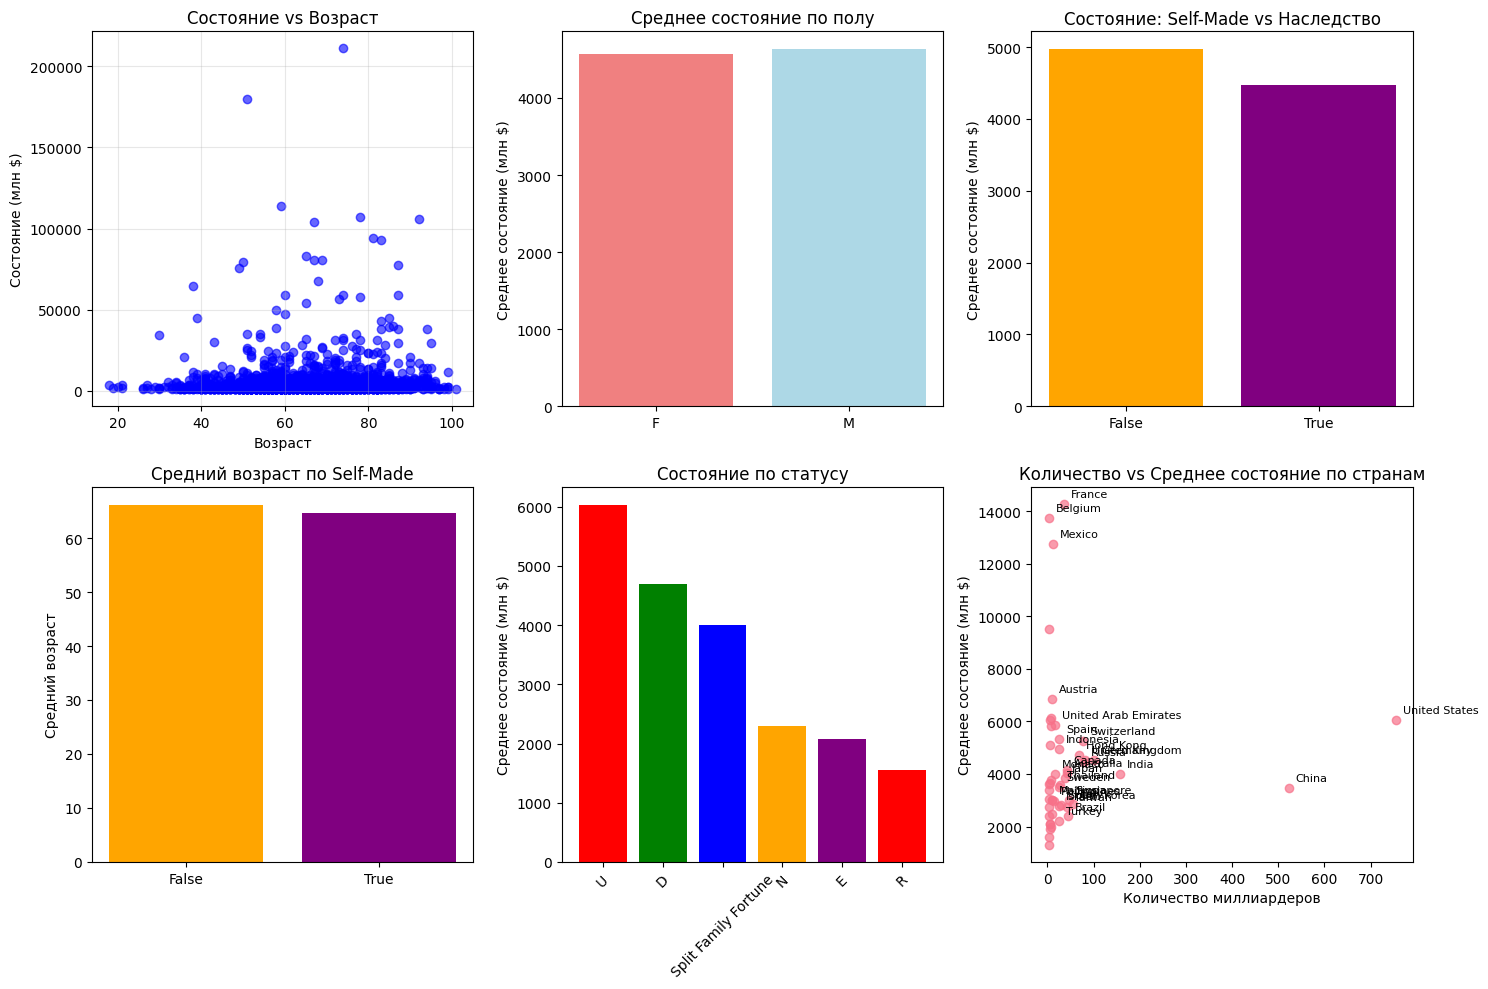


ДОПОЛНИТЕЛЬНАЯ СТАТИСТИКА:
Всего записей в анализе: 2640
Средний возраст миллиардеров: 65.1 лет
Медианный возраст: 65.0 лет
Распределение по полу:
gender
M    2303
F     337
Name: count, dtype: int64

Распределение по Self-Made:
selfMade
True     1812
False     828
Name: count, dtype: int64


In [23]:
# 1. Анализ связи между состоянием и демографическими факторами
print("=== СВЯЗЬ СОСТОЯНИЯ С ДЕМОГРАФИЧЕСКИМИ ФАКТОРАМИ ===")

# Создаем копию данных для анализа
analysis_df = df[['age', 'finalWorth', 'gender', 'selfMade', 'status', 'country']].copy()

# Обрабатываем пропуски в возрасте - заполняем медианой или удаляем
print(f"Пропуски в данных:")
print(f"Возраст: {analysis_df['age'].isna().sum()}")
print(f"Состояние: {analysis_df['finalWorth'].isna().sum()}")
print(f"Пол: {analysis_df['gender'].isna().sum()}")
print(f"Self-Made: {analysis_df['selfMade'].isna().sum()}")

# Для корреляционного анализа создаем датафрейм без пропусков в возрасте и состоянии
corr_df = analysis_df[['age', 'finalWorth']].dropna()
print(f"\nДанных для корреляционного анализа: {len(corr_df)} строк")

plt.figure(figsize=(15, 10))

# Состояние vs Возраст
plt.subplot(2, 3, 1)
plt.scatter(corr_df['age'], corr_df['finalWorth'], alpha=0.6, color='blue')
plt.xlabel('Возраст')
plt.ylabel('Состояние (млн $)')
plt.title('Состояние vs Возраст')
plt.grid(True, alpha=0.3)

# Расчет корреляции
if len(corr_df) >= 2:
    age_wealth_corr_pearson = pearsonr(corr_df['age'], corr_df['finalWorth'])[0]
    age_wealth_corr_spearman = spearmanr(corr_df['age'], corr_df['finalWorth'])[0]
    print(f"Корреляция Возраст-Состояние (Pearson): {age_wealth_corr_pearson:.3f}")
    print(f"Корреляция Возраст-Состояние (Spearman): {age_wealth_corr_spearman:.3f}")
else:
    print("Недостаточно данных для расчета корреляции")

# Состояние по полу
plt.subplot(2, 3, 2)
gender_data = analysis_df[analysis_df['gender'].notna()]
gender_wealth = gender_data.groupby('gender')['finalWorth'].mean()
colors = ['lightcoral', 'lightblue', 'lightgreen']
plt.bar(gender_wealth.index, gender_wealth.values, color=colors[:len(gender_wealth)])
plt.ylabel('Среднее состояние (млн $)')
plt.title('Среднее состояние по полу')

# Статистическая значимость различий по полу
male_wealth = analysis_df[analysis_df['gender'] == 'M']['finalWorth'].dropna()
female_wealth = analysis_df[analysis_df['gender'] == 'F']['finalWorth'].dropna()

if len(male_wealth) > 0 and len(female_wealth) > 0:
    t_stat, p_value = stats.ttest_ind(male_wealth, female_wealth, nan_policy='omit')
    print(f"\nT-тест различий по полу: t={t_stat:.3f}, p-value={p_value:.3f}")
    if p_value < 0.05:
        print("Различия статистически значимы (p < 0.05)")
    else:
        print("Различия не статистически значимы")
else:
    print("Недостаточно данных для t-теста по полу")

# Состояние по Self-Made
plt.subplot(2, 3, 3)
selfmade_data = analysis_df[analysis_df['selfMade'].notna()]
selfmade_wealth = selfmade_data.groupby('selfMade')['finalWorth'].mean()
plt.bar([str(x) for x in selfmade_wealth.index], selfmade_wealth.values, color=['orange', 'purple'])
plt.ylabel('Среднее состояние (млн $)')
plt.title('Состояние: Self-Made vs Наследство')

# Статистическая значимость Self-Made
selfmade_true = analysis_df[analysis_df['selfMade'] == True]['finalWorth'].dropna()
selfmade_false = analysis_df[analysis_df['selfMade'] == False]['finalWorth'].dropna()

if len(selfmade_true) > 0 and len(selfmade_false) > 0:
    t_stat_selfmade, p_value_selfmade = stats.ttest_ind(selfmade_true, selfmade_false, nan_policy='omit')
    print(f"T-тест Self-Made: t={t_stat_selfmade:.3f}, p-value={p_value_selfmade:.3f}")
    if p_value_selfmade < 0.05:
        print("Различия Self-Made статистически значимы (p < 0.05)")
    else:
        print("Различия Self-Made не статистически значимы")
else:
    print("Недостаточно данных для t-теста Self-Made")

# Распределение возраста по Self-Made
plt.subplot(2, 3, 4)
selfmade_age_data = analysis_df[analysis_df['selfMade'].notna() & analysis_df['age'].notna()]
selfmade_age = selfmade_age_data.groupby('selfMade')['age'].mean()
plt.bar([str(x) for x in selfmade_age.index], selfmade_age.values, color=['orange', 'purple'])
plt.ylabel('Средний возраст')
plt.title('Средний возраст по Self-Made')

# Состояние по статусу
plt.subplot(2, 3, 5)
status_data = analysis_df[analysis_df['status'].notna()]
status_wealth = status_data.groupby('status')['finalWorth'].mean().sort_values(ascending=False)
plt.bar(status_wealth.index, status_wealth.values, color=['red', 'green', 'blue', 'orange', 'purple'][:len(status_wealth)])
plt.ylabel('Среднее состояние (млн $)')
plt.title('Состояние по статусу')
plt.xticks(rotation=45)

# Количество миллиардеров по странам vs среднее состояние
plt.subplot(2, 3, 6)
country_data = analysis_df[analysis_df['country'].notna()]
country_stats = country_data.groupby('country').agg({'finalWorth': ['count', 'mean']})
country_stats.columns = ['count', 'mean_wealth']
country_stats = country_stats[country_stats['count'] >= 3]  # Только страны с ≥3 миллиардерами

if len(country_stats) > 0:
    plt.scatter(country_stats['count'], country_stats['mean_wealth'], alpha=0.7)
    plt.xlabel('Количество миллиардеров')
    plt.ylabel('Среднее состояние (млн $)')
    plt.title('Количество vs Среднее состояние по странам')
    
    # Добавляем подписи для некоторых стран
    for i, (country, row) in enumerate(country_stats.iterrows()):
        if row['count'] > 10 or row['mean_wealth'] > 10000:  # Подписываем крупные страны
            plt.annotate(country, (row['count'], row['mean_wealth']), 
                        xytext=(5, 5), textcoords='offset points', fontsize=8)
else:
    plt.text(0.5, 0.5, 'Недостаточно данных\nпо странам', 
             ha='center', va='center', transform=plt.gca().transAxes)
    plt.title('Недостаточно данных по странам')

plt.tight_layout()
plt.show()

# Дополнительная статистика
print(f"\nДОПОЛНИТЕЛЬНАЯ СТАТИСТИКА:")
print(f"Всего записей в анализе: {len(analysis_df)}")
print(f"Средний возраст миллиардеров: {analysis_df['age'].mean():.1f} лет")
print(f"Медианный возраст: {analysis_df['age'].median():.1f} лет")
print(f"Распределение по полу:")
print(analysis_df['gender'].value_counts())
print(f"\nРаспределение по Self-Made:")
print(analysis_df['selfMade'].value_counts())


=== СВЯЗЬ ОТРАСЛЕЙ С ДЕМОГРАФИЧЕСКИМИ ФАКТОРАМИ ===


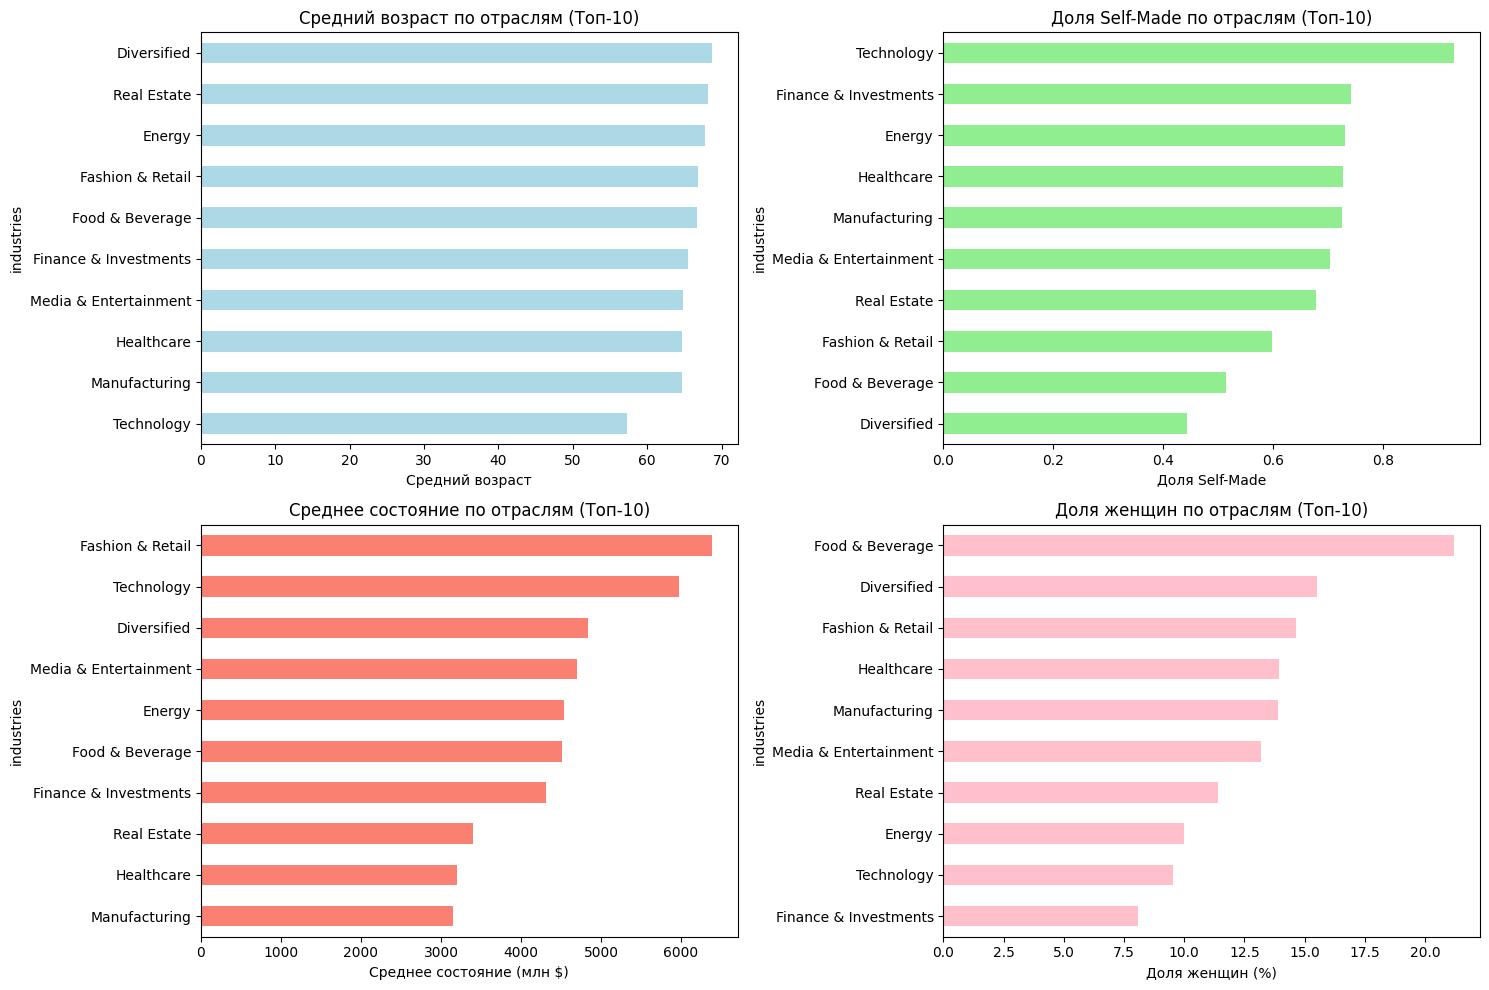


Статистический анализ различий между отраслями:
Finance & Investments: t=-0.654, p-value=0.513
Manufacturing: t=-2.894, p-value=0.004
Technology: t=2.607, p-value=0.009


In [24]:
# 2. Анализ связи между отраслями и демографическими факторами
print("\n=== СВЯЗЬ ОТРАСЛЕЙ С ДЕМОГРАФИЧЕСКИМИ ФАКТОРАМИ ===")

# Топ-10 отраслей по количеству миллиардеров
top_industries = df['industries'].value_counts().head(10).index

plt.figure(figsize=(15, 10))

# Средний возраст по отраслям
plt.subplot(2, 2, 1)
industry_age = df[df['industries'].isin(top_industries)].groupby('industries')['age'].mean().sort_values()
industry_age.plot(kind='barh', color='lightblue')
plt.xlabel('Средний возраст')
plt.title('Средний возраст по отраслям (Топ-10)')

# Доля Self-Made по отраслям
plt.subplot(2, 2, 2)
industry_selfmade = df[df['industries'].isin(top_industries)].groupby('industries')['selfMade'].mean().sort_values()
industry_selfmade.plot(kind='barh', color='lightgreen')
plt.xlabel('Доля Self-Made')
plt.title('Доля Self-Made по отраслям (Топ-10)')

# Среднее состояние по отраслям
plt.subplot(2, 2, 3)
industry_wealth = df[df['industries'].isin(top_industries)].groupby('industries')['finalWorth'].mean().sort_values()
industry_wealth.plot(kind='barh', color='salmon')
plt.xlabel('Среднее состояние (млн $)')
plt.title('Среднее состояние по отраслям (Топ-10)')

# Доля женщин по отраслям
plt.subplot(2, 2, 4)
industry_gender = df[df['industries'].isin(top_industries)]
industry_gender = industry_gender[industry_gender['gender'].isin(['M', 'F'])]
industry_gender_pct = industry_gender.groupby('industries')['gender'].apply(
    lambda x: (x == 'F').sum() / len(x) * 100
).sort_values()
industry_gender_pct.plot(kind='barh', color='pink')
plt.xlabel('Доля женщин (%)')
plt.title('Доля женщин по отраслям (Топ-10)')

plt.tight_layout()
plt.show()

# Статистический анализ различий между отраслями
print("\nСтатистический анализ различий между отраслями:")
for industry in top_industries[:3]:  # Анализ для топ-3 отраслей
    industry_data = df[df['industries'] == industry]['finalWorth']
    other_data = df[df['industries'] != industry]['finalWorth']
    t_stat, p_value = stats.ttest_ind(industry_data, other_data, nan_policy='omit')
    print(f"{industry}: t={t_stat:.3f}, p-value={p_value:.3f}")


=== СВЯЗЬ ЭКОНОМИЧЕСКИХ ПОКАЗАТЕЛЕЙ С БЛАГОСОСТОЯНИЕМ ===
Пропуски в экономических показателях после очистки:
gdp_country: 2476 непустых значений
cpi_country: 2456 непустых значений
life_expectancy_country: 2458 непустых значений
gross_tertiary_education_enrollment: 2458 непустых значений
tax_revenue_country_country: 2457 непустых значений


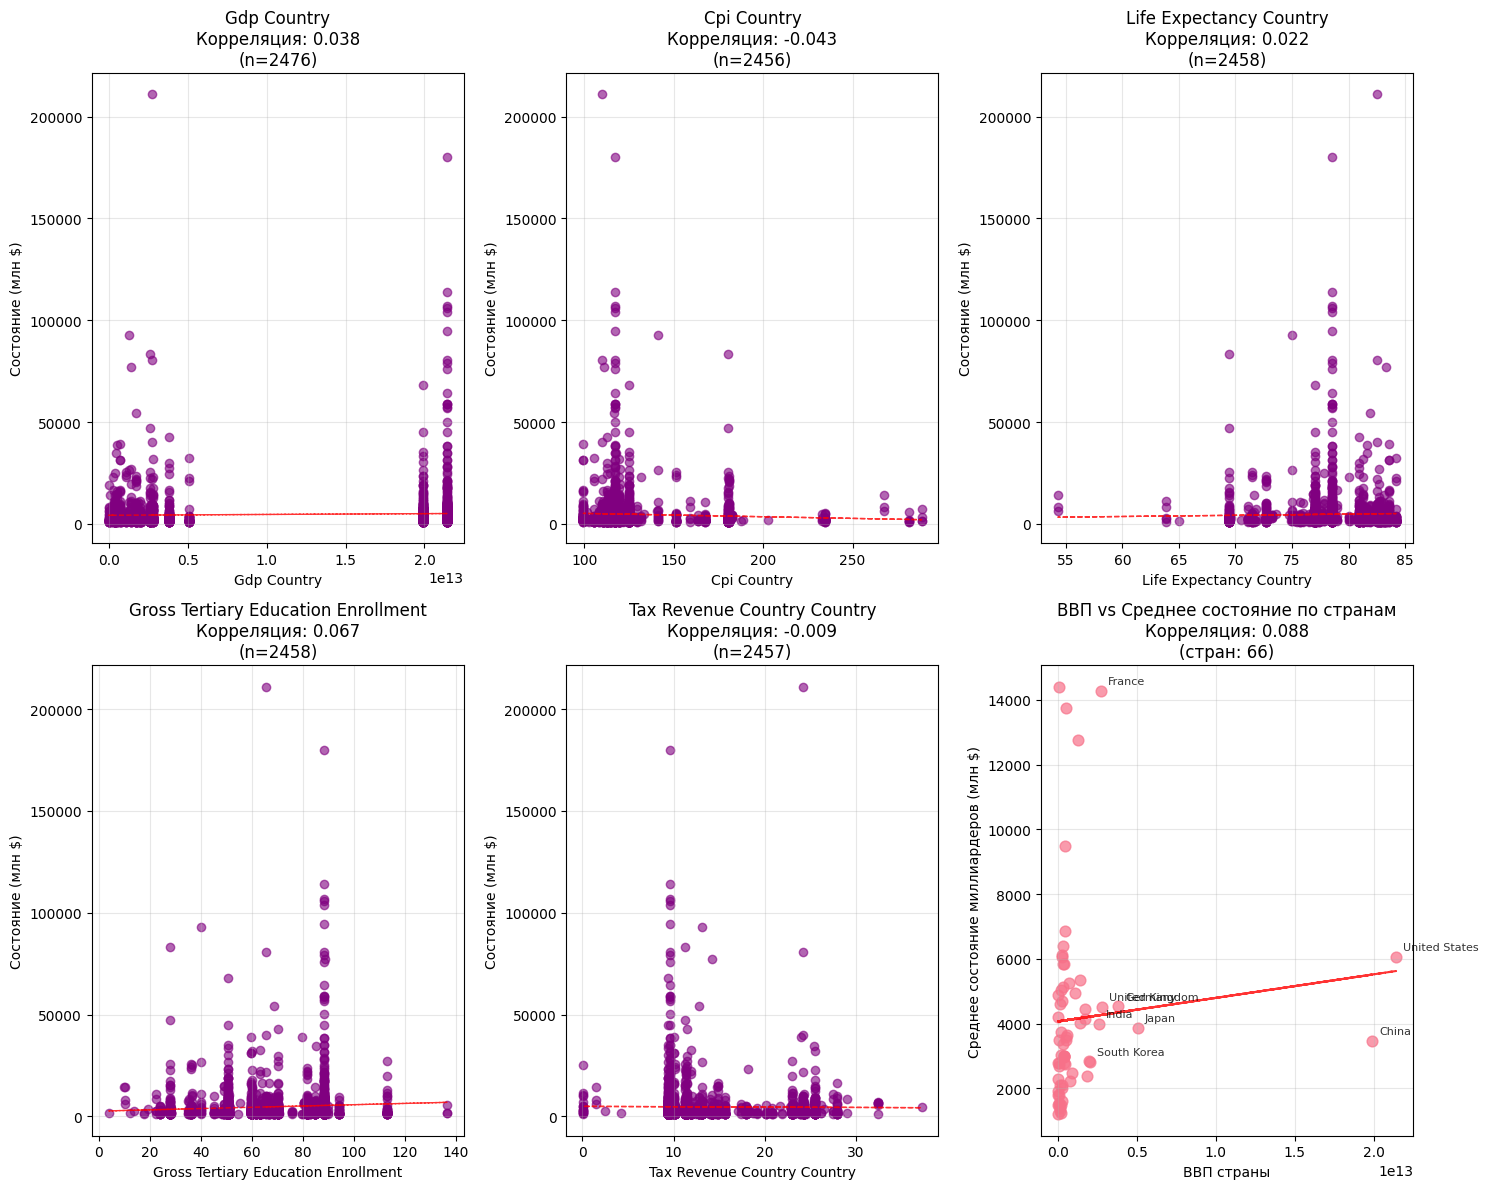


ДЕТАЛЬНЫЙ АНАЛИЗ КОРРЕЛЯЦИЙ:

Gdp Country:
  Наблюдений: 2476
  Корреляция Пирсона: 0.038
  Корреляция Спирмена: 0.097
  Интерпретация: слабая положительная связь

Cpi Country:
  Наблюдений: 2456
  Корреляция Пирсона: -0.043
  Корреляция Спирмена: -0.104
  Интерпретация: слабая отрицательная связь

Life Expectancy Country:
  Наблюдений: 2458
  Корреляция Пирсона: 0.022
  Корреляция Спирмена: 0.084
  Интерпретация: слабая положительная связь

Gross Tertiary Education Enrollment:
  Наблюдений: 2458
  Корреляция Пирсона: 0.067
  Корреляция Спирмена: 0.137
  Интерпретация: слабая положительная связь

Tax Revenue Country Country:
  Наблюдений: 2457
  Корреляция Пирсона: -0.009
  Корреляция Спирмена: 0.007
  Интерпретация: слабая отрицательная связь

АНАЛИЗ ПО УРОВНЮ ВВП СТРАН:
Не удалось создать квинтили: Bin labels must be one fewer than the number of bin edges
Используем альтернативный метод разбиения...

Среднее состояние по уровням ВВП (равные интервалы):
  Очень низкий ВВП: 4393 млн$ 

C:\Users\pentryyy\AppData\Local\Temp\ipykernel_3444\2058028503.py:166: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  gdp_wealth = economic_df.groupby('gdp_quintile')['finalWorth'].agg(['mean', 'median', 'count']).dropna()


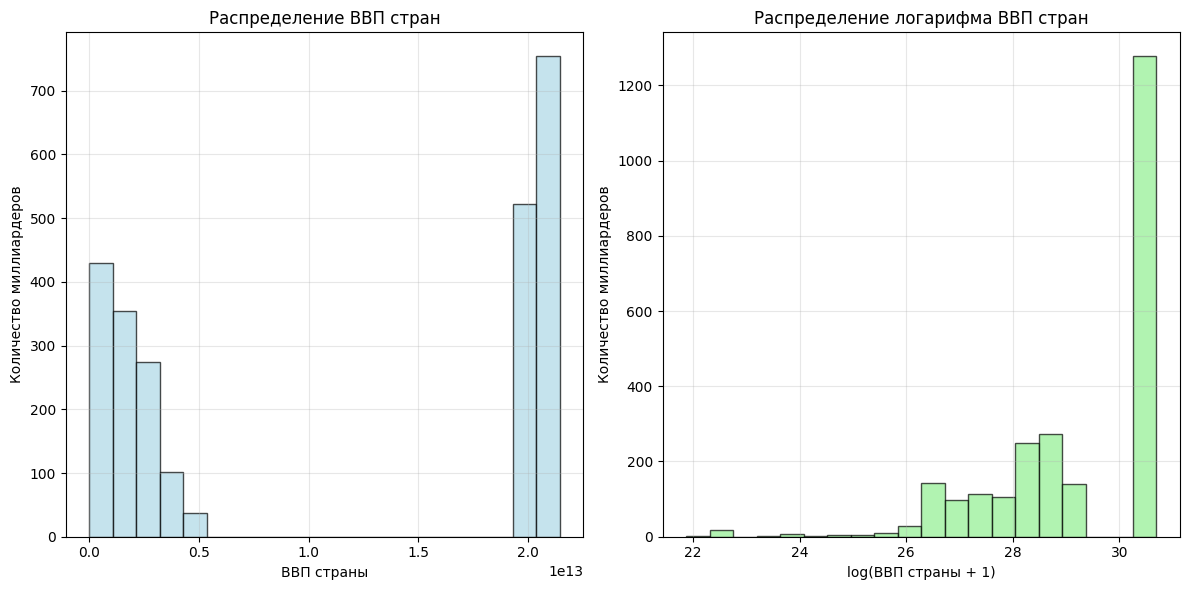

In [29]:
# 3. Анализ связи экономических показателей стран с благосостоянием миллиардеров
print("\n=== СВЯЗЬ ЭКОНОМИЧЕСКИХ ПОКАЗАТЕЛЕЙ С БЛАГОСОСТОЯНИЕМ ===")

economic_vars = ['gdp_country', 'cpi_country', 'life_expectancy_country', 
                'gross_tertiary_education_enrollment', 'tax_revenue_country_country']

# Создаем копию данных и очищаем экономические показатели
economic_df = df[['finalWorth', 'country'] + economic_vars].copy()

# Функция для очистки числовых колонок
def clean_numeric_column(series):
    """Очищает числовую колонку от нечисловых символов"""
    if series.dtype == 'object':
        # Удаляем символы $, €, запятые, пробелы и другие нечисловые символы (кроме точки, минуса и цифр)
        series = series.astype(str).str.replace(r'[^\d.-]', '', regex=True)
        # Заменяем пустые строки на NaN
        series = series.replace('', np.nan)
    return pd.to_numeric(series, errors='coerce')

# Очищаем экономические показатели
for var in economic_vars:
    economic_df[var] = clean_numeric_column(economic_df[var])

print("Пропуски в экономических показателях после очистки:")
for var in economic_vars:
    non_null_count = economic_df[var].notna().sum()
    print(f"{var}: {non_null_count} непустых значений")

plt.figure(figsize=(15, 12))

for i, var in enumerate(economic_vars, 1):
    plt.subplot(2, 3, i)
    
    # Фильтруем данные без пропусков
    plot_data = economic_df[[var, 'finalWorth']].dropna()
    
    if len(plot_data) > 0:
        plt.scatter(plot_data[var], plot_data['finalWorth'], alpha=0.6, color='purple')
        plt.xlabel(var.replace('_', ' ').title())
        plt.ylabel('Состояние (млн $)')
        
        # Расчет корреляции
        if len(plot_data) >= 2:
            corr = pearsonr(plot_data[var], plot_data['finalWorth'])[0]
            plt.title(f'{var.replace("_", " ").title()}\nКорреляция: {corr:.3f}\n(n={len(plot_data)})')
            
            # Добавляем линию тренда
            if len(plot_data) > 1:
                z = np.polyfit(plot_data[var], plot_data['finalWorth'], 1)
                p = np.poly1d(z)
                plt.plot(plot_data[var], p(plot_data[var]), "r--", alpha=0.8, linewidth=1)
        else:
            plt.title(f'{var.replace("_", " ").title()}\nНедостаточно данных')
        
        plt.grid(True, alpha=0.3)
    else:
        plt.text(0.5, 0.5, 'Нет данных', ha='center', va='center', transform=plt.gca().transAxes)
        plt.title(f'{var.replace("_", " ").title()}\nНет данных')

# Анализ на уровне стран (средние значения)
plt.subplot(2, 3, 6)
country_economic = economic_df.groupby('country').agg({
    'finalWorth': 'mean',
    'gdp_country': 'mean',
    'life_expectancy_country': 'mean'
}).dropna()

if len(country_economic) > 3:  # Минимум 4 страны для анализа
    plt.scatter(country_economic['gdp_country'], country_economic['finalWorth'], alpha=0.7, s=60)
    plt.xlabel('ВВП страны')
    plt.ylabel('Среднее состояние миллиардеров (млн $)')
    
    # Добавляем названия стран для крупнейших точек
    top_countries = country_economic.nlargest(8, 'gdp_country')  # Топ-8 по ВВП
    
    for country in top_countries.index:
        plt.annotate(country, 
                   (top_countries.loc[country, 'gdp_country'], top_countries.loc[country, 'finalWorth']),
                   xytext=(5, 5), textcoords='offset points', fontsize=8, alpha=0.8)
    
    corr_country = pearsonr(country_economic['gdp_country'], country_economic['finalWorth'])[0]
    plt.title(f'ВВП vs Среднее состояние по странам\nКорреляция: {corr_country:.3f}\n(стран: {len(country_economic)})')
    plt.grid(True, alpha=0.3)
    
    # Линия тренда для стран
    z_country = np.polyfit(country_economic['gdp_country'], country_economic['finalWorth'], 1)
    p_country = np.poly1d(z_country)
    plt.plot(country_economic['gdp_country'], p_country(country_economic['gdp_country']), "r--", alpha=0.8)
else:
    plt.text(0.5, 0.5, 'Недостаточно данных\nпо странам', ha='center', va='center', transform=plt.gca().transAxes)
    plt.title('Анализ по странам\nНедостаточно данных')

plt.tight_layout()
plt.show()

# Детальный анализ корреляций
print("\nДЕТАЛЬНЫЙ АНАЛИЗ КОРРЕЛЯЦИЙ:")
print("=" * 50)

for var in economic_vars:
    analysis_data = economic_df[[var, 'finalWorth']].dropna()
    if len(analysis_data) >= 10:  # Минимум 10 наблюдений для надежности
        corr_pearson = pearsonr(analysis_data[var], analysis_data['finalWorth'])[0]
        corr_spearman = spearmanr(analysis_data[var], analysis_data['finalWorth'])[0]
        
        print(f"\n{var.replace('_', ' ').title()}:")
        print(f"  Наблюдений: {len(analysis_data)}")
        print(f"  Корреляция Пирсона: {corr_pearson:.3f}")
        print(f"  Корреляция Спирмена: {corr_spearman:.3f}")
        
        # Интерпретация корреляции
        if abs(corr_pearson) < 0.3:
            strength = "слабая"
        elif abs(corr_pearson) < 0.7:
            strength = "умеренная"
        else:
            strength = "сильная"
        
        direction = "положительная" if corr_pearson > 0 else "отрицательная"
        print(f"  Интерпретация: {strength} {direction} связь")
    else:
        print(f"\n{var.replace('_', ' ').title()}: недостаточно данных ({len(analysis_data)} наблюдений)")

# Анализ по квинтилям ВВП (исправленная версия)
print("\n" + "=" * 50)
print("АНАЛИЗ ПО УРОВНЮ ВВП СТРАН:")

if economic_df['gdp_country'].notna().sum() > 0:
    gdp_data = economic_df['gdp_country'].dropna()
    
    if len(gdp_data) >= 5:
        try:
            # Пробуем создать квинтили с удалением дубликатов
            economic_df['gdp_quintile'] = pd.qcut(
                economic_df['gdp_country'], 
                q=5, 
                labels=['Очень низкий', 'Низкий', 'Средний', 'Высокий', 'Очень высокий'],
                duplicates='drop'
            )
            
            gdp_wealth = economic_df.groupby('gdp_quintile')['finalWorth'].agg(['mean', 'median', 'count']).dropna()
            
            if len(gdp_wealth) > 0:
                print("\nСреднее состояние по уровням ВВП:")
                for quintile, row in gdp_wealth.iterrows():
                    print(f"  {quintile} ВВП: {row['mean']:.0f} млн$ (n={row['count']})")
            else:
                print("Не удалось создать группы по ВВП (дублирующиеся границы)")
                
        except ValueError as e:
            print(f"Не удалось создать квинтили: {e}")
            print("Используем альтернативный метод разбиения...")
            
            # Альтернативный метод: используем pd.cut с равными интервалами
            gdp_min = gdp_data.min()
            gdp_max = gdp_data.max()
            
            # Создаем равные интервалы
            try:
                economic_df['gdp_quintile'] = pd.cut(
                    economic_df['gdp_country'],
                    bins=5,
                    labels=['Очень низкий', 'Низкий', 'Средний', 'Высокий', 'Очень высокий']
                )
                
                gdp_wealth = economic_df.groupby('gdp_quintile')['finalWorth'].agg(['mean', 'median', 'count']).dropna()
                
                if len(gdp_wealth) > 0:
                    print("\nСреднее состояние по уровням ВВП (равные интервалы):")
                    for quintile, row in gdp_wealth.iterrows():
                        print(f"  {quintile} ВВП: {row['mean']:.0f} млн$ (n={row['count']})")
                        
            except Exception as e2:
                print(f"Не удалось создать равные интервалы: {e2}")
                
                # Простой метод: децили вместо квинтилей
                try:
                    economic_df['gdp_decile'] = pd.qcut(
                        economic_df['gdp_country'], 
                        q=10,  # Используем больше групп
                        duplicates='drop'
                    )
                    
                    # Группируем по децилям и анализируем
                    gdp_decile_stats = economic_df.groupby('gdp_decile')['finalWorth'].mean().dropna()
                    
                    if len(gdp_decile_stats) > 0:
                        print("\nСреднее состояние по децилям ВВП:")
                        for i, (decile, wealth) in enumerate(gdp_decile_stats.items()):
                            count = economic_df[economic_df['gdp_decile'] == decile]['finalWorth'].count()
                            level_name = ['Очень низкий', 'Низкий', 'Ниже среднего', 'Средний', 
                                        'Выше среднего', 'Высокий', 'Очень высокий'][min(i, 6)]
                            print(f"  {level_name}: {wealth:.0f} млн$ (n={count})")
                            
                except Exception as e3:
                    print(f"Все методы не сработали: {e3}")
    
    else:
        print(f"Недостаточно данных для анализа по ВВП (только {len(gdp_data)} наблюдений)")

# Альтернативный анализ: топ-10 стран по ВВП
print("\n" + "=" * 50)
print("ТОП-10 СТРАН ПО ВВП И СРЕДНЕМУ СОСТОЯНИЮ:")

if len(country_economic) > 0:
    top10_gdp = country_economic.nlargest(10, 'gdp_country')
    print("\nТоп-10 стран по ВВП:")
    for country, row in top10_gdp.iterrows():
        print(f"  {country}: ВВП = {row['gdp_country']:,.0f}, среднее состояние = {row['finalWorth']:.0f} млн$")
    
    # Также покажем топ-10 по среднему состоянию
    top10_wealth = country_economic.nlargest(10, 'finalWorth')
    print("\nТоп-10 стран по среднему состоянию миллиардеров:")
    for country, row in top10_wealth.iterrows():
        print(f"  {country}: среднее состояние = {row['finalWorth']:.0f} млн$, ВВП = {row['gdp_country']:,.0f}")

# Упрощенный анализ: сравнение стран с высоким и низким ВВП
print("\n" + "=" * 50)
print("СРАВНЕНИЕ СТРАН С ВЫСОКИМ И НИЗКИМ ВВП:")

if len(country_economic) >= 4:
    # Берем квартили для разделения
    gdp_25 = country_economic['gdp_country'].quantile(0.25)
    gdp_75 = country_economic['gdp_country'].quantile(0.75)
    
    low_gdp_countries = country_economic[country_economic['gdp_country'] <= gdp_25]
    high_gdp_countries = country_economic[country_economic['gdp_country'] >= gdp_75]
    
    print(f"\nСтраны с низким ВВП (ниже 25% перцентиля):")
    print(f"  Количество стран: {len(low_gdp_countries)}")
    print(f"  Среднее состояние: {low_gdp_countries['finalWorth'].mean():.0f} млн$")
    
    print(f"\nСтраны с высоким ВВП (выше 75% перцентиля):")
    print(f"  Количество стран: {len(high_gdp_countries)}")
    print(f"  Среднее состояние: {high_gdp_countries['finalWorth'].mean():.0f} млн$")
    
    # T-тест для проверки значимости различий
    if len(low_gdp_countries) > 1 and len(high_gdp_countries) > 1:
        t_stat, p_value = stats.ttest_ind(low_gdp_countries['finalWorth'], high_gdp_countries['finalWorth'])
        print(f"\nT-тест различий: t={t_stat:.3f}, p-value={p_value:.3f}")
        if p_value < 0.05:
            print("Различия статистически значимы (p < 0.05)")
        else:
            print("Различия не статистически значимы")

# Визуализация распределения ВВП
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
if economic_df['gdp_country'].notna().sum() > 0:
    plt.hist(economic_df['gdp_country'].dropna(), bins=20, alpha=0.7, color='lightblue', edgecolor='black')
    plt.xlabel('ВВП страны')
    plt.ylabel('Количество миллиардеров')
    plt.title('Распределение ВВП стран')
    plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
if economic_df['gdp_country'].notna().sum() > 0:
    plt.hist(np.log1p(economic_df['gdp_country'].dropna()), bins=20, alpha=0.7, color='lightgreen', edgecolor='black')
    plt.xlabel('log(ВВП страны + 1)')
    plt.ylabel('Количество миллиардеров')
    plt.title('Распределение логарифма ВВП стран')
    plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Пункт - 5.  Многомерный анализ (2 балла)

## Решение
В этом блоке необходимо написать код, построить нужные визуализации и рассчитать нужные статистики для решения этой части задания. Можно создать столько ячеек с кодом, сколько нужно для выполнения задания

In [ ]:
# Здесь код решения

## Ответ
В этом блоке необходимо вывести ответ для этой части задания. Ответ должен описаться на написанный код, построенные визуализации и проведенные расчеты. Если необходимо, то можно записать ответ в нескольких ячейках.

In [ ]:
# Здесь код подготовки ответа и сам ответ